In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image
from IPython.display import display
from collections import defaultdict

In [2]:
train_file = np.load('../source/src_data/train.npz')
train_data = train_file['data']
print("train_data's shape", train_data.shape)
test_file = np.load('../source/src_data/test_input.npz')
test_data = test_file['data']
print("test_data's shape", test_data.shape)

train_data's shape (10000, 50, 110, 6)
test_data's shape (2100, 50, 50, 6)


In [4]:
obj_types = ['vehicle', 'pedestrian', 'motorcyclist', 'cyclist', 'bus', 'static', 'background', 'construction', 'riderless_bicycle', 'unknown']
obj_mapping = {idx: obj for idx, obj in enumerate(obj_types)}

## Visualization

In [19]:
# make gif out of a scene.
def make_gif(data_matrix, name='example'):
   cmap = plt.cm.get_cmap('viridis', 50)
   fig, ax = plt.subplots(figsize=(10, 10))
   # Function to update plot for each frame
   def update(frame):
       ax.clear()

       # Get data for current timestep
       for i in range(1, data_matrix.shape[0]):
           x = data_matrix[i, frame, 0]
           y = data_matrix[i, frame, 1]
           if x != 0 and y != 0:
               xs = data_matrix[i, :frame+1, 0]  # Include current frame
               ys = data_matrix[i, :frame+1, 1]  # Include current frame
               # trim all zeros
               mask = (xs != 0) & (ys != 0)  # Only keep points where both x and y are non-zero
               xs = xs[mask]
               ys = ys[mask]

               # Only plot if we have points to plot
               if len(xs) > 0 and len(ys) > 0:
                   color = cmap(i)
                   ax.plot(xs, ys, alpha=0.9, color=color)
                   ax.scatter(x, y, s=80, color=color)

       ax.plot(data_matrix[0, :frame, 0], data_matrix[0, :frame, 1], color='tab:orange', label='Ego Vehicle')
       ax.scatter(data_matrix[0, frame, 0], data_matrix[0, frame, 1], s=80, color='tab:orange')
       # Set title with timestep
       ego_obj = obj_mapping[data_matrix[0][0][5]]
       ax.set_title(f'Timestep {frame} ({ego_obj})')
       # Set consistent axis limits
       ax.set_xlim(data_matrix[:,:,0][data_matrix[:,:,0] != 0].min() - 10, data_matrix[:,:,0][data_matrix[:,:,0] != 0].max() + 10)
       ax.set_ylim(data_matrix[:,:,1][data_matrix[:,:,1] != 0].min() - 10, data_matrix[:,:,1][data_matrix[:,:,1] != 0].max() + 10)
       ax.legend()

       return ax.collections + ax.lines

   # Create animation
   anim = animation.FuncAnimation(fig, update, frames=list(range(0, data_matrix.shape[1], 3)),
                               interval=100, blit=True)
   # Save as GIF
   anim.save(f'trajectory_visualization_{name}.gif', writer='pillow')
   plt.close()


In [41]:
for k in range(7441, 7442):
    data_matrix = train_data[k]
    make_gif(data_matrix, f'index{k}')

/var/folders/rr/7jgc7k856_35qn8z9_k2bmyw0000gn/T/ipykernel_92861/124546528.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 50)


In [17]:
train_data[0][0][0]

array([ 338.59322192, -672.21574762,   -5.32538052,    1.61518358,
          2.84662927,    0.        ])

## Statistics

In [27]:
testing_obj_tally = defaultdict(int)
for scene in test_data:
    ego_obj = obj_mapping[scene[0][0][5]]
    testing_obj_tally[ego_obj] += 1
print(testing_obj_tally)

defaultdict(<class 'int'>, {'vehicle': 2100})


In [28]:
training_obj_tally = defaultdict(int)
for scene in train_data:
    ego_obj = obj_mapping[scene[0][0][5]]
    training_obj_tally[ego_obj] += 1
print(training_obj_tally)

defaultdict(<class 'int'>, {'vehicle': 10000})


In [44]:
## check object type consistency
max_v = 0
zero_ego = 0
for s_idx, scene in enumerate(train_data):
    if scene[0, 0, 0] == 0:
        zero_ego += 1
    for a_idx, agent in enumerate(scene):
        is_consistent = np.all(agent[:, 5] == agent[0, 5])
        if agent[0, 5] > max_v:
            max_v = agent[0, 5]
        # if not is_consistent:
        #     print(f'obj type not consistent, scene: {s_idx}, agent: {a_idx}')
        #     print(agent[:, 5])
        #     break
# for scene in test_data:
#     for agent in scene:
#         is_consistent = np.all(agent[:, 5] == agent[0, 5])
#         if not is_consistent:
#             print('obj type not consistent')
#             print(agent[:, 5])
#             break

In [47]:
train_data[7441][0]

array([[ 3.80309897e+03,  3.36713926e+03,  8.05694886e+00,
        -1.13640282e-01, -1.55580073e-02,  0.00000000e+00],
       [ 3.80387664e+03,  3.36712776e+03,  8.05694886e+00,
        -1.13640282e-01, -1.56379490e-02,  0.00000000e+00],
       [ 3.80483663e+03,  3.36711338e+03,  1.54318164e+01,
        -2.17660059e-01, -1.57318044e-02,  0.00000000e+00],
       [ 3.80597168e+03,  3.36709612e+03,  1.54676874e+01,
        -2.22884165e-01, -1.58298379e-02,  0.00000000e+00],
       [ 3.80726799e+03,  3.36707614e+03,  1.55725443e+01,
        -2.49021458e-01, -1.59338161e-02,  0.00000000e+00],
       [ 3.80870584e+03,  3.36705367e+03,  1.54363598e+01,
        -2.39122957e-01, -1.60389836e-02,  0.00000000e+00],
       [ 3.81025715e+03,  3.36702907e+03,  1.55249761e+01,
        -2.52718359e-01, -1.61437038e-02,  0.00000000e+00],
       [ 3.81188805e+03,  3.36700284e+03,  1.54514618e+01,
        -2.50504734e-01, -1.62375845e-02,  0.00000000e+00],
       [ 3.81355794e+03,  3.36697558e+03,  1.545

## Heatmap

In [8]:
## get x,y (min, max) range
xy_in = train_data[:, :, :50, :2].reshape(-1, 2)
x_max = xy_in[..., 0].max()
x_min = xy_in[..., 0].min()
y_max = xy_in[..., 1].max()
y_min = xy_in[..., 1].min()
x_max, x_min, y_max, y_min

(np.float64(13261.224654462281),
 np.float64(-9305.083204919727),
 np.float64(6655.740660588215),
 np.float64(-4571.46243221495))

In [6]:
def plot_heatmap(data, title=None, bins=5):
    plt.figure(figsize=(6, 6))

    x_max = data[..., 0].max()
    x_min = data[..., 0].min()
    y_max = data[..., 1].max()
    y_min = data[..., 1].min()

    plt.hist2d(data[:, 0], data[:, 1], bins=bins, cmap='hot')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(title)
    plt.colorbar(label='Density')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

In [51]:
xy_in = train_data[:, :, :50, :2].reshape(-1, 2)
# only find the x, y != 0
xy_in_not_0 = xy_in[(xy_in[:, 0] != 0) & (xy_in[:, 1] != 0)]

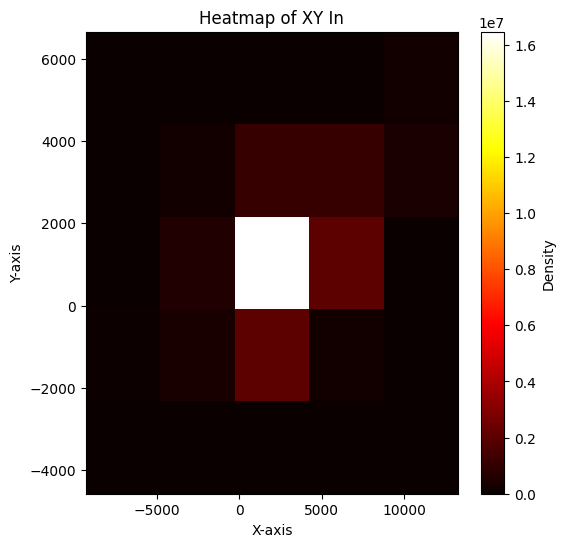

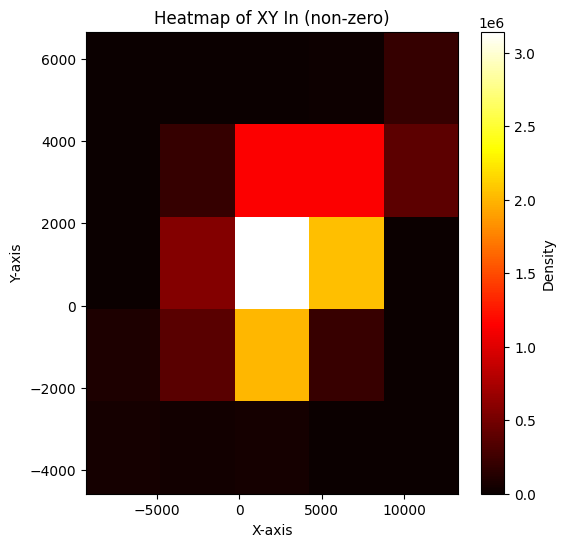

In [52]:
plot_heatmap(xy_in, title='Heatmap of XY In', bins=5)
plot_heatmap(xy_in_not_0, title='Heatmap of XY In (non-zero)', bins=5)

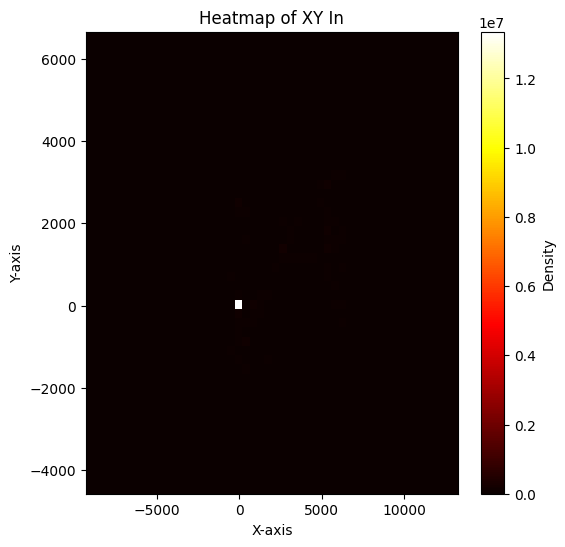

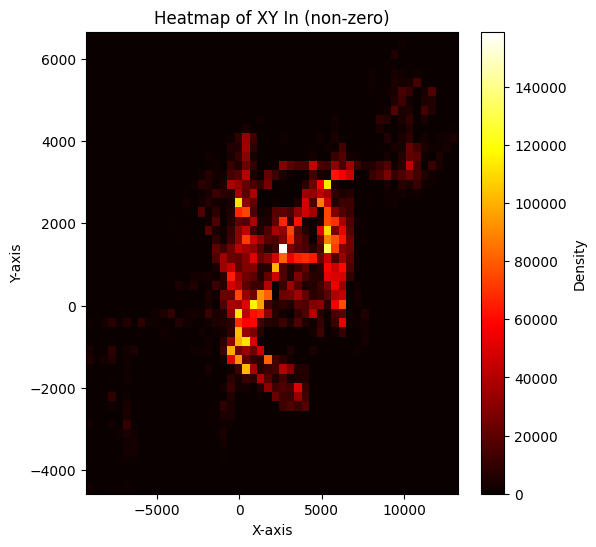

In [53]:
plot_heatmap(xy_in, title='Heatmap of XY In', bins=50)
plot_heatmap(xy_in_not_0, title='Heatmap of XY In (non-zero)', bins=50)

## Total distance traveled

In [3]:
from scipy.spatial.distance import pdist

In [4]:
training_coor = train_data[:, 0, :50, :2]
test_coor = test_data[:, 0, :, :2]

In [8]:
training_dist = []
for sample in training_coor:
    distances = pdist(sample)
    training_dist.append(np.max(distances))

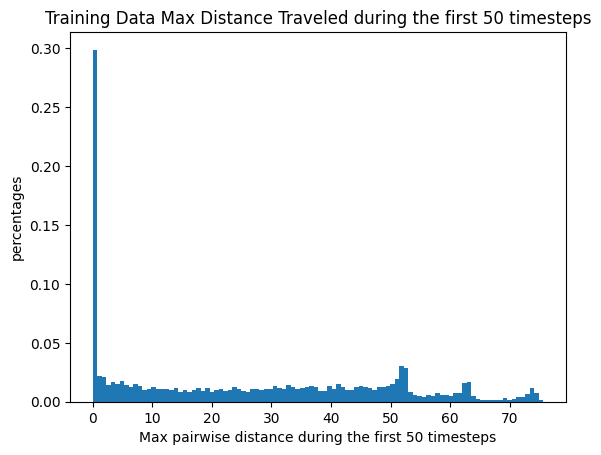

In [16]:
plt.hist(training_dist, bins=100, density=True)
plt.xlabel('Max pairwise distance during the first 50 timesteps')
plt.ylabel('percentages')
plt.title('Training Data Max Distance Traveled during the first 50 timesteps')
plt.savefig('training_dist_travelled.png')

In [14]:
testing_dist = []
for sample in test_coor:
    distances = pdist(sample)
    testing_dist.append(np.max(distances))

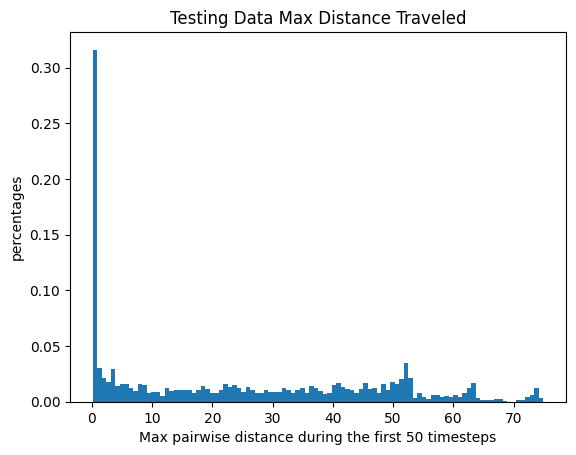

In [17]:
plt.hist(testing_dist, bins=100, density=True)
plt.xlabel('Max pairwise distance during the first 50 timesteps')
plt.ylabel('percentages')
plt.title('Testing Data Max Distance Traveled')
plt.savefig('testing_dist_travelled.png')